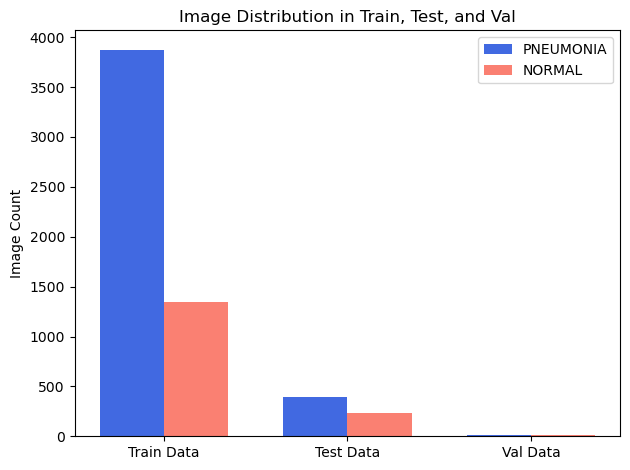

In [1]:
import os
import matplotlib.pyplot as plt

# Set the base directory where your data is stored
base_dir = 'chest_xray'  # e.g., 'chest_xray'

# Subfolders
splits = ['train', 'test', 'val']
classes = ['PNEUMONIA', 'NORMAL']

# Dictionary to hold counts
data_counts = {cls: [] for cls in classes}

# Count images in each class per split
for split in splits:
    split_path = os.path.join(base_dir, split)
    for cls in classes:
        class_path = os.path.join(split_path, cls)
        count = len(os.listdir(class_path))
        data_counts[cls].append(count)

# Plotting
x = range(len(splits))  # [0, 1, 2]
bar_width = 0.35

fig, ax = plt.subplots()
ax.bar([p - bar_width/2 for p in x], data_counts['PNEUMONIA'], width=bar_width, label='PNEUMONIA', color='royalblue')
ax.bar([p + bar_width/2 for p in x], data_counts['NORMAL'], width=bar_width, label='NORMAL', color='salmon')

ax.set_xticks(x)
ax.set_xticklabels([s.capitalize() + ' Data' for s in splits])
ax.set_ylabel('Image Count')
ax.set_title('Image Distribution in Train, Test, and Val')
ax.legend()

plt.tight_layout()
plt.show()


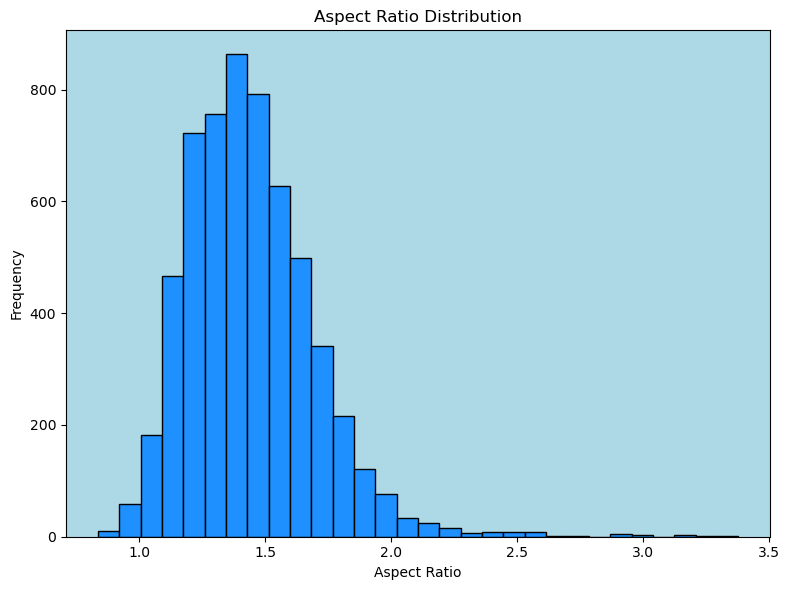

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the base directory
base_dir = 'chest_xray'  # e.g., 'chest_xray'
splits = ['train', 'test', 'val']
classes = ['PNEUMONIA', 'NORMAL']

aspect_ratios = []

# Loop over all images in all splits
for split in splits:
    for cls in classes:
        folder_path = os.path.join(base_dir, split, cls)
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, filename)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        if height != 0:
                            aspect_ratio = width / height
                            aspect_ratios.append(aspect_ratio)
                except Exception as e:
                    print(f"Error with {img_path}: {e}")

# Plotting the aspect ratio histogram
plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=30, color='dodgerblue', edgecolor='black')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.grid(False)
plt.gca().set_facecolor('lightblue')  # Match the background like in your example
plt.tight_layout()
plt.show()


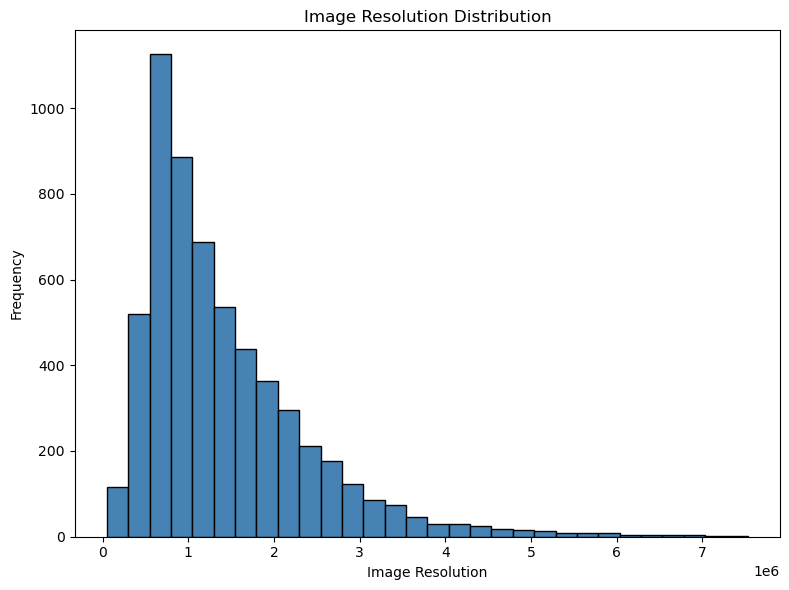

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Base directory of your dataset
base_dir = 'chest_xray'  # Replace with your dataset path
splits = ['train', 'test', 'val']
classes = ['PNEUMONIA', 'NORMAL']

# List to store resolutions
resolutions = []

# Loop through images and calculate resolutions
for split in splits:
    for cls in classes:
        folder_path = os.path.join(base_dir, split, cls)
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, filename)
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        resolutions.append(width * height)
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(resolutions, bins=30, color='steelblue', edgecolor='black')
plt.title('Image Resolution Distribution')
plt.xlabel('Image Resolution')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step
(624, 2)


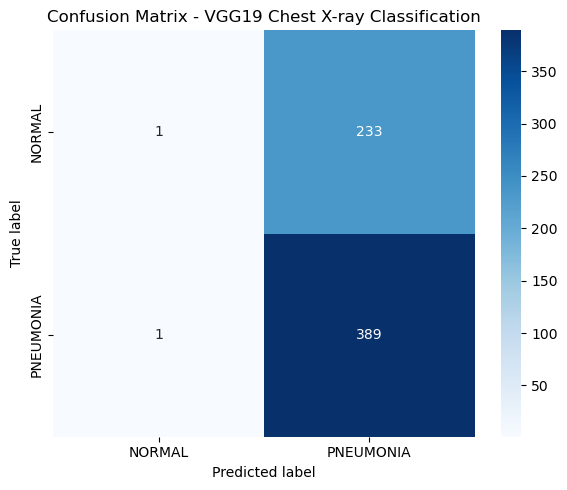

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# ====== Step 1: Configuration ======
img_size = 128  # VGG19 expects 224x224 input
batch_size = 32
model_path = 'model_weights/vgg_unfrozen.h5'  # ✅ Replace with your actual model filename
test_dir = 'chest_xray/test'        # or 'val'

# ====== Step 2: Load Model ======
model = load_model(model_path)

# ====== Step 3: Load Test Images ======
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',  # binary classification (NORMAL vs PNEUMONIA)
    shuffle=False
)

# ====== Step 4: Predictions ======
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
print(y_pred_prob.shape)

cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())  # ['NORMAL', 'PNEUMONIA']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, cbar=True)
plt.title('Confusion Matrix - VGG19 Chest X-ray Classification')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


Found 624 images belonging to 2 classes.


C:\Users\Sweety\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step


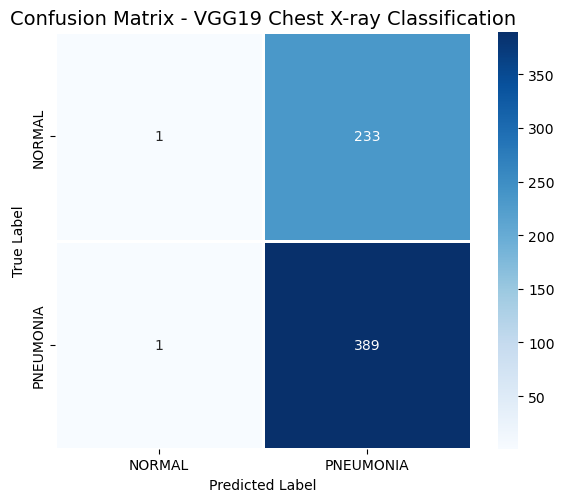

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import math

# ====== Step 1: Setup ======
img_size = 128
batch_size = 32
model_path = 'model_weights/vgg_unfrozen.h5'  # Replace with your model
test_dir = 'chest_xray/test'

# ====== Step 2: Load Model ======
model = load_model(model_path)

# ====== Step 3: Load Test Data ======
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',  # Important for softmax output
    shuffle=False
)

# ====== Step 4: Predictions ======
steps = math.ceil(test_generator.samples / batch_size)
y_pred_prob = model.predict(test_generator, steps=steps)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())  # ['NORMAL', 'PNEUMONIA']

# ====== Step 5: Confusion Matrix ======
cm = confusion_matrix(y_true, y_pred)

# ====== Step 6: Plot Heatmap ======
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            linewidths=1, linecolor='white', square=True, cbar=True)
plt.title('Confusion Matrix - VGG19 Chest X-ray Classification', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [31]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
import math

# ====== Step 1: Configuration ======
img_size = 128
batch_size = 32
model_path = 'model_weights/vgg_unfrozen.h5'   # 🔁 Update this path
test_dir = 'chest_xray/test'

# ====== Step 2: Load the model ======
model = load_model(model_path)

# ====== Step 3: Load test data ======
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ====== Step 4: Predictions ======
steps = math.ceil(test_generator.samples / batch_size)
y_pred_prob = model.predict(test_generator, steps=steps)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())  # ['NORMAL', 'PNEUMONIA']

# ====== Step 5: Evaluation Metrics ======
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
print(f"F1 Score (weighted):     {f1:.4f}")
print(f"Precision (weighted):    {precision:.4f}")
print(f"Recall (weighted):       {recall:.4f}")
print(f"Accuracy:                {accuracy:.4f}")


Found 624 images belonging to 2 classes.


C:\Users\Sweety\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step
Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.50      0.00      0.01       234
   PNEUMONIA       0.63      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.56      0.50      0.39       624
weighted avg       0.58      0.62      0.48       624

F1 Score (weighted):     0.4837
Precision (weighted):    0.5784
Recall (weighted):       0.6250
Accuracy:                0.6250
